# **넷플릭스 선호컨텐츠 분석**
---

> **프로젝트명**

```
▶ 넷플릭스 선호 컨텐츠 분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 인사이트 도출
```

> **목표**

```
▶ 넷플릭스 사용자들의 대량의 컨텐츠에 대한 선호도를 분석하고, 이를 통해 컨텐츠 제작 및 구매 전략에 필요한 인사이트를 도출해야 함
```  

> **기대효과**

```
▶ 데이터 분석을 통해 사용자의 선호와 시청 패턴에 대한 정확한 이해를 바탕으로 전략적인 컨텐츠 관리 및 마케팅 계획을 수립할 수 있음
▶ 시청자 데이터를 기반으로 한 인사이트 도출을 통해 넷플릭스의 컨텐츠 포트폴리오를 최적화할 수 있음
```

> **해결방안**

```
▶ 메타데이터를 활용한 다차원적인 데이터 분석 수행
▶ 사용자의 시청 기록과 프로파일 데이터를 분석하여 선호도 패턴 이해
▶ 인구통계학적 데이터와 결합하여 시청자 기반의 시장 분석 수행
```

> **성과측정**  

```
▶ 분석 결과의 인사이트가 컨텐츠 관련 의사결정에 얼마나 영향을 미치는지 평가
▶ 데이터 기반 결정의 성과를 측정하기 위한 KPI 설정(예: 컨텐츠 관람수, 사용자 확보 수, 구독 전환율 등)
```

> **운영**  

```
▶ 정기적인 데이터 분석을 통한 시장 동향 및 사용자 선호의 변화 모니터링
▶ 분석 결과를 컨텐츠 구매, 제작, 마케팅 전략에 실질적으로 적용
```

In [8]:
import os
os.chdir('C:/Users/user/Desktop/석한/DATA')
os.getcwd()

'C:\\Users\\user\\Desktop\\석한\\DATA'

In [9]:
# pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [11]:
# Data read
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### **Data 정보 탐색**

In [17]:
# Data shape 확인
df.shape

(7787, 12)

In [18]:
# Data columns & type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [19]:
# Null 값 확인
print(df.isnull().sum())

# 어떤 영향을 끼칠지 모르는 Null 이므로 삭제보단 보관 및 보완으로,

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [20]:
# Outlier 확인
df.describe()

# int값은 release_year 뿐, 이상치라 보기 어려운 관측치임

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### **EDA**

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


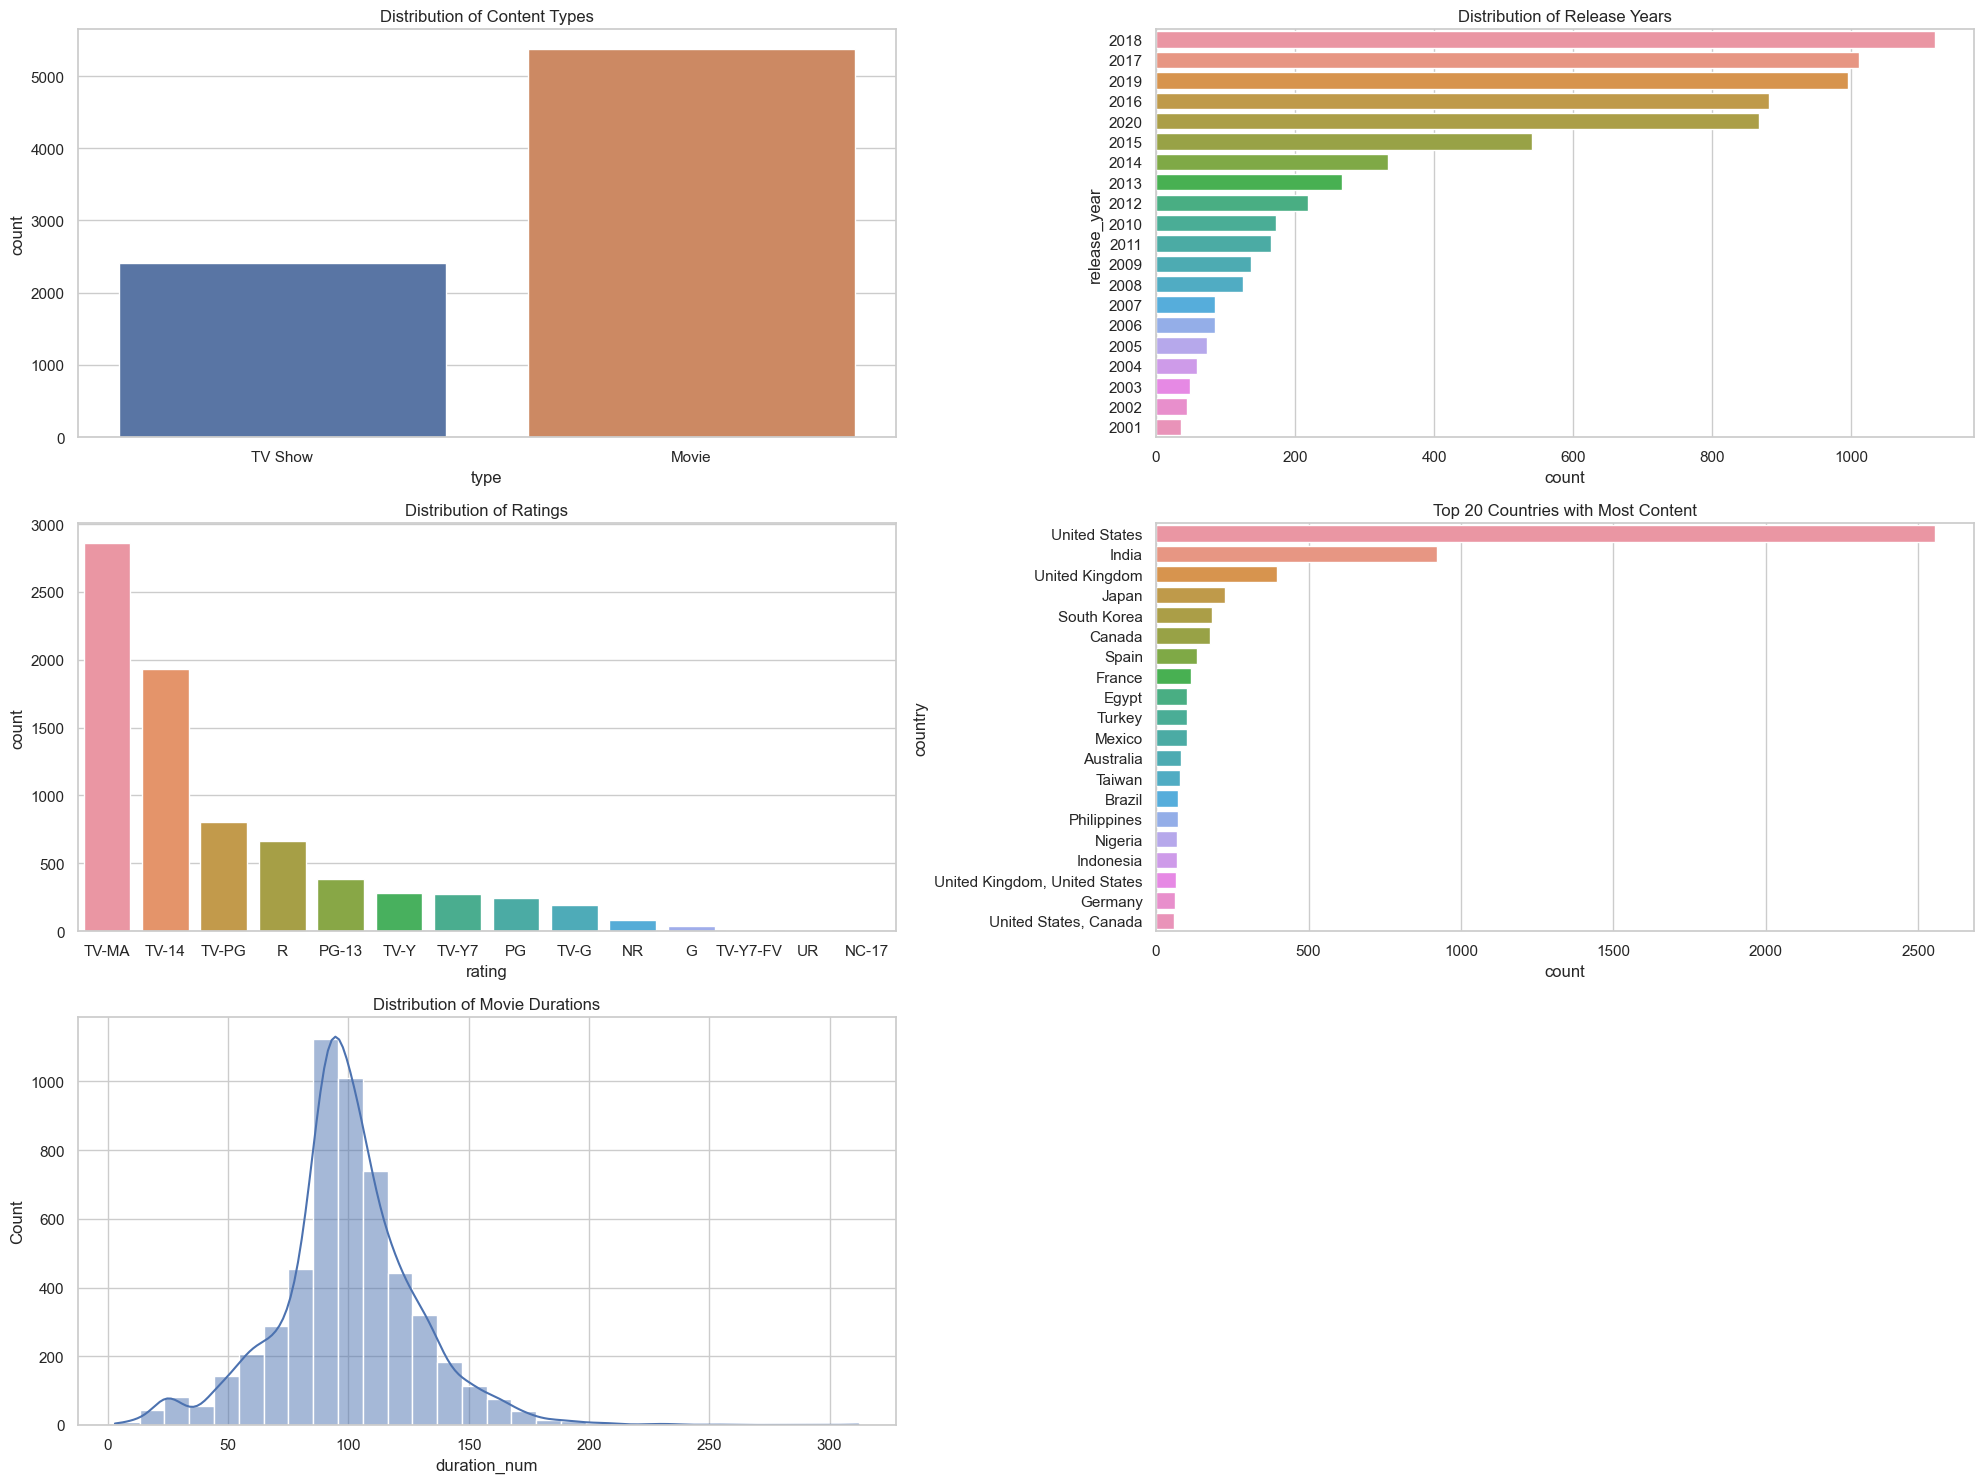

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# 설정: Seaborn
sns.set(style="whitegrid")

# 데이터 프레임에서 'duration'의 숫자만 추출하기 위해 필요한 작업
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

#  시각화를 위한 그래프 크기 설정
plt.figure(figsize=(20, 15))

# type 분포
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')

# release_year 분포
plt.subplot(3, 2, 2)
sns.countplot(data=df, y='release_year', order=df['release_year'].value_counts().index[:20])
plt.title('Distribution of Release Years')

# rating 분포
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')

# country 분포 (상위 20개)
plt.subplot(3, 2, 4)
top_countries = df['country'].value_counts().index[:20]
sns.countplot(data=df, y='country', order=top_countries)
plt.title('Top 20 Countries with Most Content')

# duration 분포 (영화만)
plt.subplot(3, 2, 5)
sns.histplot(data=df[df['type'] == 'Movie'], x='duration_num', bins=30, kde=True)
plt.title('Distribution of Movie Durations')

# 그래프 보여주기
plt.tight_layout()
plt.show()

> **EDA**  

```
▶ 'Movie'가 'TV Show'보다 훨씬 많은 것으로 나타남
▶ 최근 몇 년 동안 출시된 컨텐츠의 수가 많으며, 특히 2018년과 2019년에 많은 컨텐츠가 출시된 것으로 보임
▶ 'TV-MA' (성인 대상) 등급의 컨텐츠가 가장 많고, 그 다음으로 'TV-14' (14세 이상 대상) 등급의 컨텐츠가 많음
▶ 미국이 압도적으로 많은 컨텐츠를 제작한 것으로 나타나며, 그 다음으로는 인도, 영국, 일본, 한국 순
▶ 대부분의 영화는 80분에서 120분 사이의 길이를 가지고 있으며, 특히 100분 주변에 많은 영화가 분포
```

### **전략수립**

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0


##### 장르별 컨텐츠

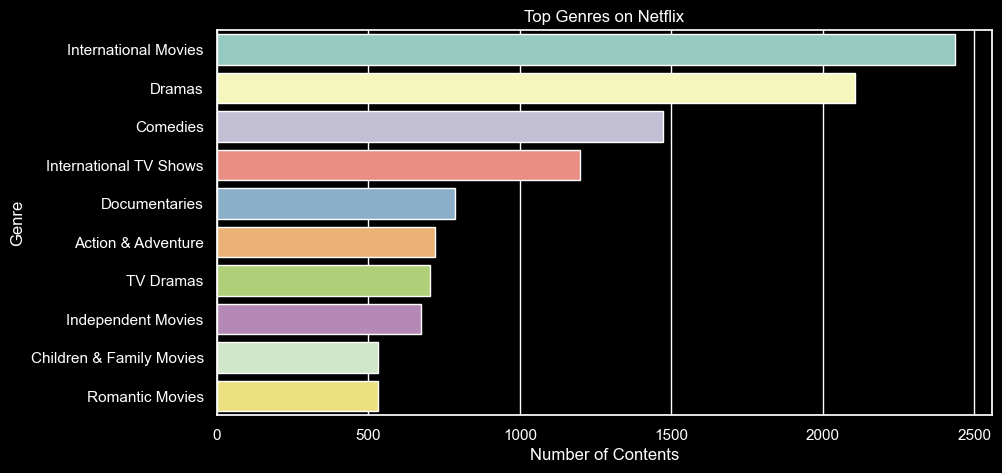

In [28]:
from collections import Counter
plt.style.use('dark_background')

# 장르별 컨텐츠 분석을 위해 'listed_in' 열에서 각 장르를 분리하고 카운트
genre_counts = Counter()
df['listed_in'].str.split(', ').apply(genre_counts.update)

# 가장 많이 등장하는 장르 상위 10개를 추출
top_genres = genre_counts.most_common(10)

# 장르별 컨텐츠 시각화
plt.figure(figsize=(10, 5))
genres = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=genres)
plt.title('Top Genres on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Genre')
plt.show()

가장 인기 있는 장르는 'International Movies'와 'Dramas',
넷플릭스가 국제적인 시청자를 대상으로 다양한 영화를 제공하고 있음을 시사

##### 국가별 컨텐츠

In [29]:
# 국가별 컨텐츠 분석을 위한 준비: 'country' 열을 분리하고 카운트
country_counts = Counter()
df['country'].dropna().str.split(', ').apply(country_counts.update)  # 결측치 제거 후 진행

# 가장 많은 컨텐츠를 생산한 국가 상위 10개를 추출
top_countries = country_counts.most_common(10)

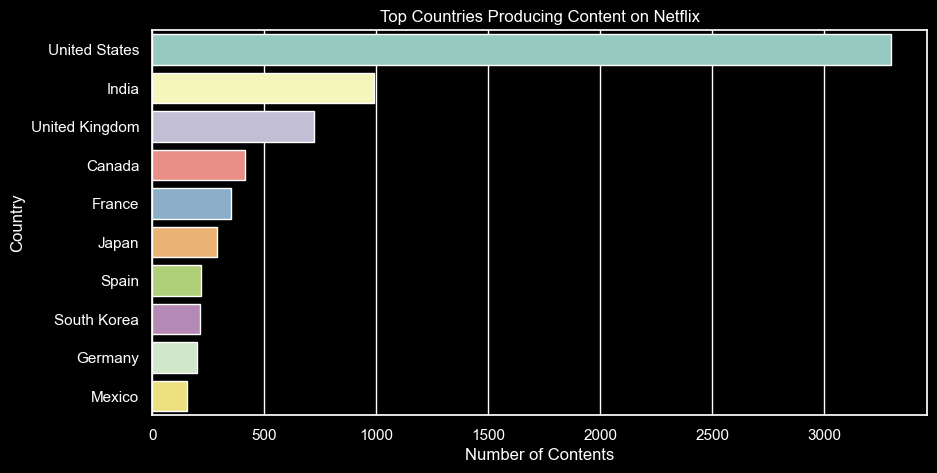

In [30]:
# 국가별 컨텐츠 시각화
plt.figure(figsize=(10, 5))
countries = pd.DataFrame(top_countries, columns=['Country', 'Count'])
sns.barplot(x='Count', y='Country', data=countries)
plt.title('Top Countries Producing Content on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Country')
plt.show()

미국이 가장 많은 컨텐츠를 생산한 국가로 나타나며, 인도와 영국이 그 뒤, 이는 넷플릭스의 컨텐츠가 주로 이들 국가에서 제작되었음을 보여줌

##### 시청자 선호도

In [32]:
# ▶ 시청자 선호도 분석을 위한 준비: 'rating' 열의 분포를 조사
rating_counts = df['rating'].value_counts()

# ▶ 출시 연도와 컨텐츠 인기도의 관계 분석을 위한 준비: 'release_year' 별 컨텐츠 수를 계산
release_year_counts = df['release_year'].value_counts().sort_index()

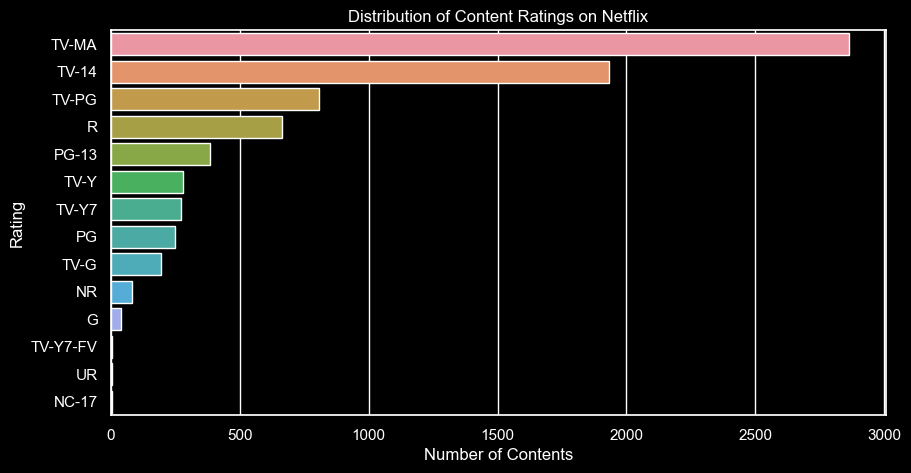

In [33]:
# ▶ 시청자 선호도 분석을 위한 준비: 'rating' 열의 분포를 조사
rating_counts = df['rating'].value_counts()

# ▶ 시청자 선호도(등급별) 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Rating')
plt.show()

가장 많은 컨텐츠는 'TV-MA' (성인 대상) 등급이며, 'TV-14' (14세 이상 대상) 등급이 그 뒤, 이는 넷플릭스가 성인 시청자를 주요 타겟으로 하고 있음을 암시

##### 컨텐츠 업데이트 패턴

In [ ]:
#▶  컨텐츠 업데이트 패턴 분석을 위한 준비: 'date_added' 열을 datetime으로 변환하고 연도별, 월별로 분석합니다.
df['date_added'] = pd.to_datetime(df['date_added'])

Error 발생

In [43]:
# 앞뒤 공백이 에러를 발생할 것이라 추측
df['date_added'] = df['date_added'].str.strip()

# 다시 변환 시도
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

content_update_by_year = df['date_added'].dt.year.value_counts().sort_index()
content_update_by_year.index = content_update_by_year.index.astype(int)
content_update_by_month = df['date_added'].dt.month_name().value_counts()

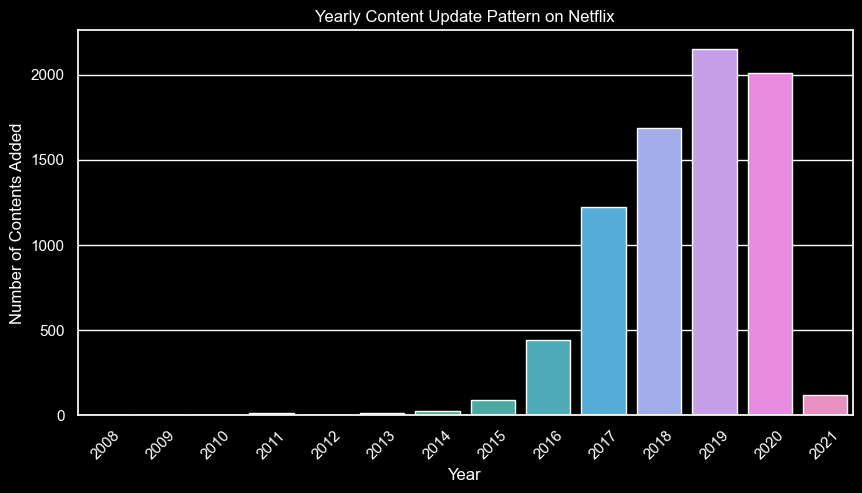

In [44]:

# 출시 연도별 컨텐츠 시각화
# 연도별 컨텐츠 업데이트 패턴 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=content_update_by_year.index, y=content_update_by_year.values)
plt.title('Yearly Content Update Pattern on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Contents Added')
plt.xticks(rotation=45)
plt.show()

넷플릭스는 2016년 이후로 매년 더 많은 컨텐츠를 추가하고 있으며, 2019년에 가장 많은 컨텐츠를 추가, 월별로는 12월에 가장 많은 컨텐츠가 추가되는 경향이 있고, 10월과 1월에도 상대적으로 많은 컨텐츠가 추가

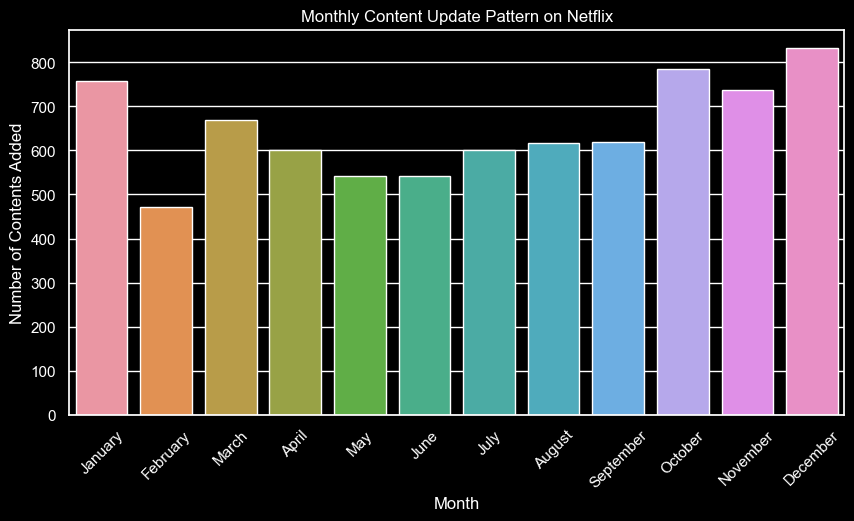

In [45]:
# ▶ 월별 컨텐츠 업데이트 패턴 시각화
plt.figure(figsize=(10, 5))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
sns.barplot(x=content_update_by_month.index, y=content_update_by_month.values, order=months_order)
plt.title('Monthly Content Update Pattern on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Contents Added')
plt.xticks(rotation=45)
plt.show()

12월에 가장 많은 컨텐츠가 추가되었으며, 특히 연말에 컨텐츠 추가가 집중되는 경향이 있는 것으로 추측, 이는 연말 시즌에 맞춘 콘텐츠 업데이트 전략을 반영 가능성 사사